In [5]:
# Initialization of camera feed, esc to capture frame
import cv2

cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    cv2.imshow("tripod cam", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: # exit on ESC
        break

cv2.imwrite('Images/Pattern match/pillcard.png', frame)
vc.release()
cv2.destroyWindow("tripod cam")

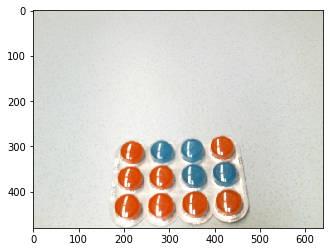

In [1]:
import cv2
import matplotlib.pyplot as plt

image_BGR = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Pattern match\\pillcard.png")
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window

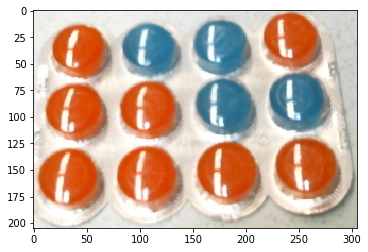

In [2]:
y_pixel = 275
x_pixel = 175

image_RGB_crop = image_RGB[y_pixel:y_pixel+(480-y_pixel), x_pixel:x_pixel+(480-x_pixel)]
plt.imshow(image_RGB_crop, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window

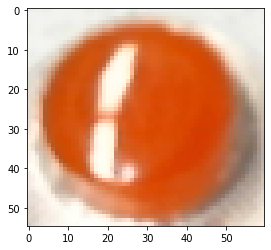

In [3]:
y_pixel = 10
x_pixel = 15

pill_img = image_RGB_crop[y_pixel:y_pixel+(65-y_pixel), x_pixel:x_pixel+(75-x_pixel)]
plt.imshow(pill_img, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window

In [33]:
template = pill_img

#https://www.pyimagesearch.com/2021/03/22/opencv-template-matching-cv2-matchtemplate/
result = cv2.matchTemplate(image_RGB, template, cv2.TM_CCOEFF_NORMED)

# show the output image
probThreshold = 0.7
h, w = template.shape[:2]
# fake out max_val for first run through loop
max_val = 1
counter = 0
while max_val > probThreshold:
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if max_val > probThreshold:
        result[max_loc[1]-h//2:max_loc[1]+h//2+1, max_loc[0]-w//2:max_loc[0]+w//2+1] = 0
        new_im = cv2.rectangle(image_BGR,(max_loc[0],max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (0,255,0) )   
        counter = counter+1

#cv2.imwrite('output.png', new_im)


print(counter)
cv2.imshow("Output", new_im)
cv2.waitKey(0)


8


-1

In [6]:
# Live detection
pill_img_copy = cv2.cvtColor(pill_img, cv2.COLOR_BGR2RGB)
template = pill_img_copy

cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, img = vc.read()
else:
    rval = False

cv2.destroyWindow("tripod cam")

while True:
    rval, img = vc.read()
    key = cv2.waitKey(20)
    
    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

# show the output image
    probThreshold = 0.7
    h, w = template.shape[:2]
    # fake out max_val for first run through loop
    max_val = 1
    counter = 0
    new_im = img
    while max_val > probThreshold:
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > probThreshold:
            result[max_loc[1]-h//2:max_loc[1]+h//2+1, max_loc[0]-w//2:max_loc[0]+w//2+1] = 0
            new_im = cv2.rectangle(img,(max_loc[0],max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (0,255,0) )   
            counter = counter+1

    #cv2.imwrite('output.png', new_im)


    print(counter)
    cv2.imshow("Output", new_im)
    cv2.waitKey(20)
        

    if key == 27: # exit on ESC
        break

vc.release()
cv2.destroyWindow("Output")

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
3
0
0
0
0
0
0
0
0
0
0
0
3
8
7
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
5
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
2
2
2
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
6
7
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
7
7
6
4
3
4
3
3
3
3
3
3
3
3
4
5
4
4
5
5
5
5
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
5
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
3
4
3
5
8
8
8
8
8
8
8
8
8
6
5
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
2
2
0
0
0
3
3
2
3
3
2
2
3
3
3
3
3
3
3
3
5
8
8
8
8
8
8
8
8
8
4
4
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
4
8
8
8
8
7
7
7
7
7
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
7
7
7
7
7
7
7
7
4
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
7
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
6
6
6
5
5
5
6
7
7
6
5
5
5
0
0
3
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
4
5
6
5
6
6
6
6
6
6
5
6
6
6
6
6
5
5
5
5
5
5
6
4
6
7
7


In [21]:
# Live detection
template = pill_img
cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, img = vc.read()
else:
    rval = False

cv2.destroyWindow("tripod cam")

while True:
    rval, img = vc.read()
    key = cv2.waitKey(20)

    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
    (startX, startY) = maxLoc
    endX = startX + template.shape[1]
    endY = startY + template.shape[0]
    h, w = template.shape[:2]
    
    probThreshold = 0.5
    max_val = 1
    while max_val > probThreshold:
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > probThreshold:
            result[max_loc[1]-h//2:max_loc[1]+h//2+1, max_loc[0]-w//2:max_loc[0]+w//2+1] = 0   
            image = cv2.rectangle(image,(max_loc[0],max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (0,255,0) )
    

    if key == 27: # exit on ESC
        break

vc.release()
cv2.destroyWindow("Output")

KeyboardInterrupt: 